# Import needed libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels

# Load data


In [3]:
def load_data(csv_filepath):
    '''
    Load data from a csv file.

    :param csv_filepath: path of the .csv file containing the data to load/extract

    :return X: array of values associated with the inputs of the data contained in the .csv file
    :return Y: array of values associated with the labels of the data contained in the .csv file or None if the file does not contain labels
    '''

    data = pd.read_csv(csv_filepath)

    # Headers' list:
    headers = data.columns # 'x' for inputs, 'y' for labels

    # Extract DataFrames based on the headers:
    x_data = data[headers[0]]

    # Convert an array-like string (e.g., '[0.02, 1.34\n, 2.12, 3.23\n]')
    # into an array of floats (e.g., [0.02, 1.34, 2.12, 3.23]):
    X_data = [[float(feature) for feature in feature_vec.replace('[', '').replace(']', '').split()] for feature_vec in x_data]

    # convert data into numpy arrays
    X = np.array(X_data)

    if len(headers)>1:
        Y_data = data[headers[1]]
        Y = np.array(Y_data)
    else:
        Y = None

    return X, Y




In [4]:
D1_path = 'dataset1.csv'
D2_path = 'dataset2.csv'

In [5]:
D1_X, D1_Y = load_data(D1_path)
D2_X, D2_Y = load_data(D2_path)

# Data distribution

Dataset: Dataset1
Input shape: (50000, 100)
Output shape: (50000,)
Number of features: 100
Number of samples: 50000
Number of classes: 10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



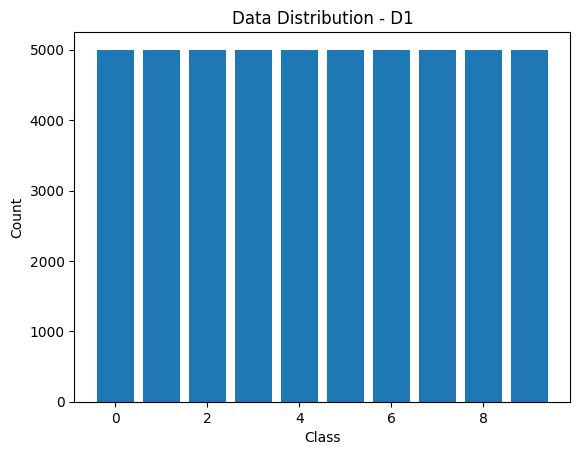

In [6]:
D1_class_counts = {}
for class_label in set(D1_Y):
    D1_class_counts[class_label] = sum(D1_Y == class_label)
class_names1 = list(D1_class_counts.keys())

print("Dataset: Dataset1")
print("Input shape: %s" %str(D1_X.shape))
print("Output shape: %s" %str(D1_Y.shape))
print("Number of features: %d" %(D1_X.shape[1]))
print("Number of samples: %d" %(D1_X.shape[0]))
print("Number of classes: %d" %(len(D1_class_counts)))
print(class_names1)
print("")
# Create a bar plot to visualize the class distribution
plt.bar(D1_class_counts.keys(), D1_class_counts.values())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution - D1')
plt.show()

Dataset: Dataset2
Input shape: (50000, 1000)
Output shape: (50000,)
Number of features: 1000
Number of samples: 50000
Number of classes: 10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



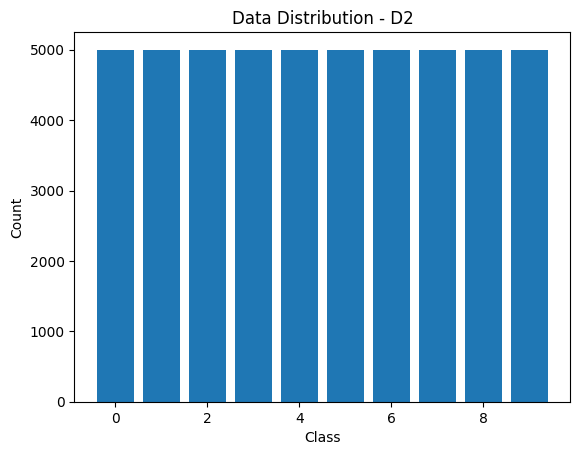

In [7]:
D2_class_counts = {}
for class_label in set(D2_Y):
    D2_class_counts[class_label] = sum(D2_Y == class_label)
class_names2 = list(D2_class_counts.keys())

print("Dataset: Dataset2")
print("Input shape: %s" %str(D2_X.shape))
print("Output shape: %s" %str(D2_Y.shape))
print("Number of features: %d" %(D2_X.shape[1]))
print("Number of samples: %d" %(D2_X.shape[0]))
print("Number of classes: %d" %(len(D2_class_counts)))
print(class_names2)
print("")
# Create a bar plot to visualize the class distribution
plt.bar(D2_class_counts.keys(), D2_class_counts.values())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution - D2')
plt.show()

# Data preprocessing

In [8]:
preprocessing_type = "standard" #min_max, standard

if preprocessing_type == "min_max":
    min_max_scaler = preprocessing.MinMaxScaler()
    D1_X_scaled = min_max_scaler.fit_transform(D1_X)
    D2_X_scaled = min_max_scaler.fit_transform(D2_X)
elif preprocessing_type == "standard":
    stdscaler = preprocessing.StandardScaler()
    D1_X_scaled = stdscaler.fit_transform(D1_X)
    D2_X_scaled = stdscaler.fit_transform(D2_X)

# Split data

In [9]:
#split data into training and test sets
D1_X_train, D1_X_test, D1_y_train, D1_y_test = train_test_split(D1_X, D1_Y, test_size=0.3, random_state=16)
D2_X_train, D2_X_test, D2_y_train, D2_y_test = train_test_split(D2_X, D2_Y, test_size=0.3, random_state=16)

print("Train: %d - Test: %d" %(D1_X_train.shape[0],D1_X_test.shape[0]))
print("Train: %d - Test: %d" %(D2_X_train.shape[0],D2_X_test.shape[0]))

Train: 35000 - Test: 15000
Train: 35000 - Test: 15000


In [10]:
X1_train, X1_test, y1_train, y1_test = train_test_split(D1_X_scaled, D1_Y, test_size=0.3, random_state=16)
X2_train, X2_test, y2_train, y2_test = train_test_split(D2_X_scaled, D2_Y, test_size=0.3, random_state=16)

print("Train: %d - Test: %d" %(X1_train.shape[0],X1_test.shape[0]))
print("Train: %d - Test: %d" %(X2_train.shape[0],X2_test.shape[0]))

Train: 35000 - Test: 15000
Train: 35000 - Test: 15000


# Data augmentation: Adding noise

In [11]:
# randomly permute a percentage of training labels for original dataset
percentage = 0.05

D1y_train_noisy = np.copy(D1_y_train)
D2y_train_noisy = np.copy(D2_y_train)

ix_size = int(percentage * len(D1y_train_noisy))

ix1 = np.random.choice(len(D1y_train_noisy),size=ix_size, replace=False)
ix2 = np.random.choice(len(D2y_train_noisy), size=ix_size, replace=False)

a = D1_y_train[ix1]
b = D2_y_train[ix2]

np.random.shuffle(a)
np.random.shuffle(b)

D1y_train_noisy[ix1] = a
D2y_train_noisy[ix2] = b


In [16]:
# randomly permute a percentage of training labels for scaled datasets
percentage = 0.05

y1_train_noisy = np.copy(y1_train)
y2_train_noisy = np.copy(y2_train)

ix_size = int(percentage * len(y1_train_noisy))

ix1 = np.random.choice(len(y1_train_noisy), size=ix_size, replace=False)
ix2 = np.random.choice(len(y2_train_noisy), size=ix_size, replace=False)

a = y1_train[ix1]
b = y2_train[ix2]

np.random.shuffle(a)
np.random.shuffle(b)

y1_train_noisy[ix1] = a
y2_train_noisy[ix2] = b

# Model

### **Support Vector Machine**

In [17]:
model1 = svm.SVC()

# defining parameter range
param_grid = [{'C': [0.01, 0.1, 1, 10],
              'kernel': ['linear','sigmoid']},
              {'C': [0.01, 0.1, 1, 10],
                'kernel': ['poly'],
                'degree': [2,3,4]},
              {'C': [0.01, 0.1, 1, 10],
                'kernel': ['rbf'],
                'gamma' :[0.001, 0.1,'scale']
                }]

#### Evaluation on Dataset1


1. Using the original dataset

              precision    recall  f1-score   support

           0     0.9941    0.9935    0.9938      1534
           1     0.9945    0.9979    0.9962      1449
           2     0.9908    0.9889    0.9899      1532
           3     0.9649    0.9739    0.9694      1497
           4     0.9908    0.9875    0.9892      1526
           5     0.9720    0.9669    0.9694      1509
           6     0.9940    0.9920    0.9930      1508
           7     0.9896    0.9931    0.9913      1440
           8     0.9972    0.9972    0.9972      1449
           9     0.9968    0.9942    0.9955      1556

    accuracy                         0.9885     15000
   macro avg     0.9885    0.9885    0.9885     15000
weighted avg     0.9885    0.9885    0.9885     15000



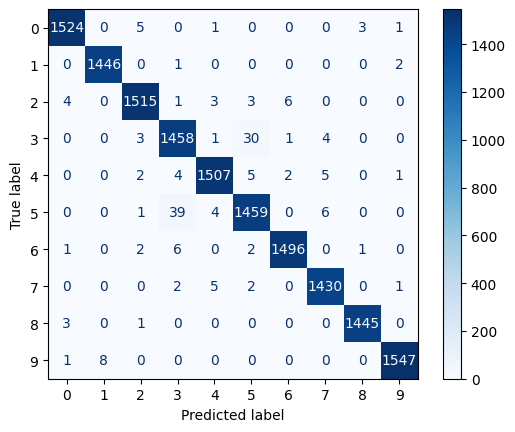

In [11]:
model1.fit(D1_X_train, D1_y_train)
y_pred = model1.predict(D1_X_test)

# print classification report
print(classification_report(D1_y_test, y_pred, digits = 4))
cm = confusion_matrix(D1_y_test, y_pred, labels=class_names1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names1)
disp.plot(cmap=plt.cm.Blues)
plt.show()

2. Using the preprocessed dataset

In [57]:
grid = GridSearchCV(model1, param_grid, cv = 5,scoring='accuracy', refit= True, verbose = 3, n_jobs=-1)

# fitting the model for grid search
grid.fit(X1_train, y1_train)

#Best parameters for the classifier
print("Best model: %r" %grid.best_estimator_)
print("Best classification hyper-parameters: %r" %grid.best_params_)
print("Best accuracy: %.4f" %grid.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.989 total time=  42.9s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.988 total time=  42.9s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.987 total time=  42.9s
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.989 total time=  43.1s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.987 total time=  42.9s
[CV 2/5] END ............C=0.01, kernel=sigmoid;, score=0.981 total time= 3.1min
[CV 1/5] END ............C=0.01, kernel=sigmoid;, score=0.981 total time= 3.1min
[CV 3/5] END ............C=0.01, kernel=sigmoid;, score=0.979 total time= 3.2min
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.989 total time=  13.2s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.987 total time=  12.8s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.989 total time=  12.8s
[CV 4/5] END ..............C=0.1, kernel=linear

              precision    recall  f1-score   support

           0     0.9948    0.9928    0.9938      1534
           1     0.9945    0.9979    0.9962      1449
           2     0.9896    0.9902    0.9899      1532
           3     0.9631    0.9753    0.9691      1497
           4     0.9921    0.9862    0.9892      1526
           5     0.9701    0.9675    0.9688      1509
           6     0.9934    0.9914    0.9924      1508
           7     0.9924    0.9917    0.9920      1440
           8     0.9972    0.9959    0.9965      1449
           9     0.9961    0.9942    0.9952      1556

    accuracy                         0.9883     15000
   macro avg     0.9883    0.9883    0.9883     15000
weighted avg     0.9883    0.9883    0.9883     15000



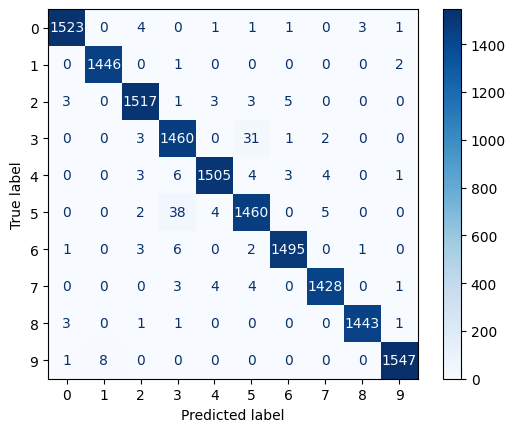

In [58]:
grid_predictions1 = grid.predict(X1_test)

print(classification_report(y1_test, grid_predictions1, digits = 4))
cm = confusion_matrix(y1_test, grid_predictions1, labels=class_names1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names1)
disp.plot(cmap=plt.cm.Blues)
plt.show()

3. Using the noisy dataset

              precision    recall  f1-score   support

           0     0.9941    0.9935    0.9938      1534
           1     0.9966    0.9986    0.9976      1449
           2     0.9928    0.9902    0.9915      1532
           3     0.9606    0.9766    0.9685      1497
           4     0.9921    0.9875    0.9898      1526
           5     0.9753    0.9669    0.9710      1509
           6     0.9940    0.9920    0.9930      1508
           7     0.9910    0.9931    0.9920      1440
           8     0.9972    0.9972    0.9972      1449
           9     0.9981    0.9961    0.9971      1556

    accuracy                         0.9891     15000
   macro avg     0.9892    0.9892    0.9892     15000
weighted avg     0.9892    0.9891    0.9891     15000



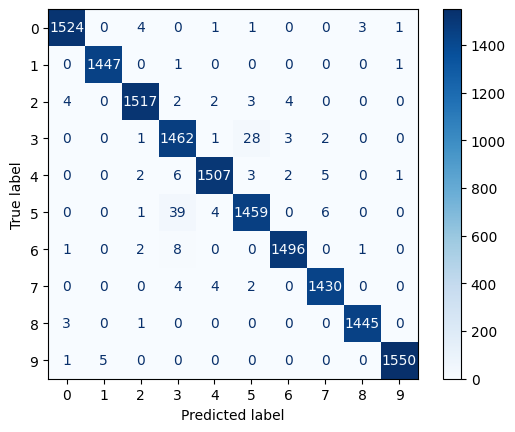

In [57]:
model1.fit(D1_X_train, D1y_train_noisy)
y_pred = model1.predict(D1_X_test)

print(classification_report(D1_y_test, y_pred, digits = 4))
cm = confusion_matrix(D1_y_test, y_pred, labels=class_names1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names1)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [58]:
#Save the model
import pickle

# save the classification model as a pickle file
model_pkl_file1 = "SVM_5%_noisy_model_D1.pkl"  

with open(model_pkl_file1, 'wb') as file:  
    pickle.dump(model1, file)


              precision    recall  f1-score   support

           0     0.9948    0.9928    0.9938      1534
           1     0.9959    0.9979    0.9969      1449
           2     0.9908    0.9876    0.9892      1532
           3     0.9618    0.9760    0.9688      1497
           4     0.9895    0.9882    0.9889      1526
           5     0.9740    0.9669    0.9704      1509
           6     0.9940    0.9907    0.9924      1508
           7     0.9910    0.9917    0.9913      1440
           8     0.9966    0.9979    0.9972      1449
           9     0.9968    0.9955    0.9961      1556

    accuracy                         0.9885     15000
   macro avg     0.9885    0.9885    0.9885     15000
weighted avg     0.9885    0.9885    0.9885     15000



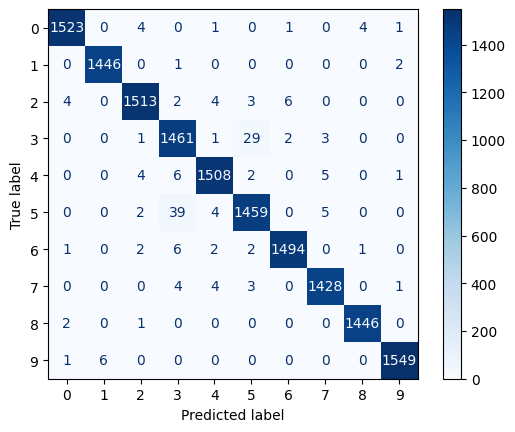

In [129]:
#Minmax scaled noisy dataset
model1.fit(X1_train, y1_train_noisy)
y_pred = model1.predict(X1_test)

print(classification_report(y1_test, y_pred, digits = 4))
cm = confusion_matrix(y1_test, y_pred, labels=class_names1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names1)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### Evaluation on Dataset2


1. Using the original dataset

              precision    recall  f1-score   support

           0     0.9876    0.9876    0.9876      1534
           1     0.9856    0.9910    0.9883      1449
           2     0.9760    0.9830    0.9795      1532
           3     0.9201    0.9459    0.9328      1497
           4     0.9763    0.9718    0.9741      1526
           5     0.9483    0.9231    0.9355      1509
           6     0.9874    0.9841    0.9857      1508
           7     0.9868    0.9833    0.9850      1440
           8     0.9945    0.9931    0.9938      1449
           9     0.9891    0.9878    0.9884      1556

    accuracy                         0.9750     15000
   macro avg     0.9752    0.9751    0.9751     15000
weighted avg     0.9751    0.9750    0.9750     15000



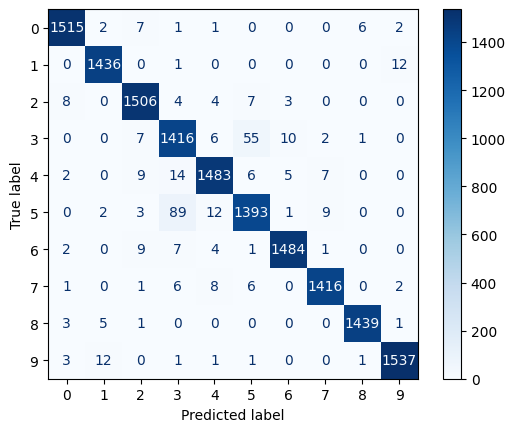

In [60]:
model1.fit(D2_X_train, D2_y_train)
y_pred = model1.predict(D2_X_test)

print(classification_report(D2_y_test, y_pred, digits = 4))
cm = confusion_matrix(D2_y_test, y_pred, labels=class_names2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names2)
disp.plot(cmap=plt.cm.Blues)
plt.show()

2. Using the preprocessed dataset

In [63]:
grid = GridSearchCV(model1, param_grid, cv = 3, scoring='accuracy', verbose = 3, n_jobs=-1)

# fitting the model for grid search
grid.fit(X2_train, y2_train)


#Best parameters for the classifier
print("Best model: %r" %grid.best_estimator_)
print("Best classification hyper-parameters: %r" %grid.best_params_)
print("Best accuracy: %.1f" %grid.best_score_)



Fitting 3 folds for each of 28 candidates, totalling 84 fits


[CV 3/3] END ..............C=0.1, kernel=linear;, score=0.972 total time= 1.2min
[CV 1/3] END ..............C=0.1, kernel=linear;, score=0.973 total time= 1.2min
[CV 2/3] END ..............C=0.1, kernel=linear;, score=0.973 total time= 1.2min
[CV 1/3] END ................C=1, kernel=linear;, score=0.970 total time= 1.1min
[CV 2/3] END ................C=1, kernel=linear;, score=0.971 total time= 1.1min
[CV 1/3] END .............C=0.1, kernel=sigmoid;, score=0.951 total time= 4.3min
[CV 3/3] END ................C=1, kernel=linear;, score=0.971 total time= 1.0min
[CV 2/3] END .............C=0.1, kernel=sigmoid;, score=0.950 total time= 4.3min
[CV 3/3] END .............C=0.1, kernel=sigmoid;, score=0.948 total time= 4.3min
[CV 1/3] END ...............C=1, kernel=sigmoid;, score=0.926 total time= 1.9min
[CV 2/3] END ...............C=1, kernel=sigmoid;, score=0.923 total time= 1.9min
[CV 1/3] END ...............C=10, kernel=linear;, score=0.964 total time= 1.3min
[CV 3/3] END ...............

              precision    recall  f1-score   support

           0     0.9863    0.9883    0.9873      1534
           1     0.9836    0.9910    0.9873      1449
           2     0.9767    0.9830    0.9798      1532
           3     0.9183    0.9459    0.9319      1497
           4     0.9757    0.9725    0.9741      1526
           5     0.9469    0.9218    0.9342      1509
           6     0.9887    0.9834    0.9860      1508
           7     0.9881    0.9826    0.9854      1440
           8     0.9945    0.9931    0.9938      1449
           9     0.9903    0.9865    0.9884      1556

    accuracy                         0.9747     15000
   macro avg     0.9749    0.9748    0.9748     15000
weighted avg     0.9748    0.9747    0.9747     15000



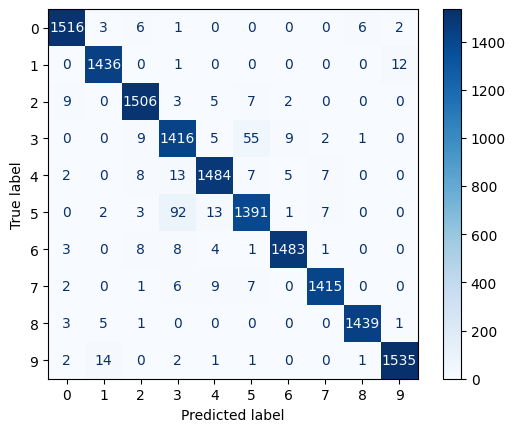

In [64]:
grid_predictions2 = grid.predict(X2_test)

print(classification_report(y2_test, grid_predictions2, digits = 4))
cm = confusion_matrix(y2_test, grid_predictions2, labels=class_names2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names2)
disp.plot(cmap=plt.cm.Blues)
plt.show()

3. Using the noisy dataset

              precision    recall  f1-score   support

           0     0.9870    0.9876    0.9873      1534
           1     0.9836    0.9910    0.9873      1449
           2     0.9767    0.9830    0.9798      1532
           3     0.9195    0.9466    0.9329      1497
           4     0.9776    0.9738    0.9757      1526
           5     0.9477    0.9245    0.9359      1509
           6     0.9893    0.9834    0.9864      1508
           7     0.9882    0.9847    0.9864      1440
           8     0.9945    0.9924    0.9934      1449
           9     0.9903    0.9865    0.9884      1556

    accuracy                         0.9753     15000
   macro avg     0.9754    0.9754    0.9754     15000
weighted avg     0.9754    0.9753    0.9753     15000



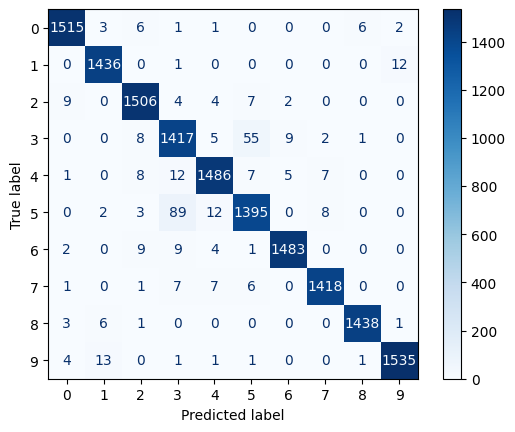

In [44]:
model1.fit(D2_X_train, D2y_train_noisy)
y_pred = model1.predict(D2_X_test)

print(classification_report(D2_y_test, y_pred, digits = 4))
cm = confusion_matrix(D2_y_test, y_pred, labels=class_names2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names2)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [45]:
# save the classification model as a pickle file
import pickle

model_pkl_file2 = "SVM_5%_noisy_model_D2.pkl"  

with open(model_pkl_file2, 'wb') as file:  
    pickle.dump(model1, file)


              precision    recall  f1-score   support

           0     0.9857    0.9889    0.9873      1534
           1     0.9842    0.9910    0.9876      1449
           2     0.9754    0.9824    0.9789      1532
           3     0.9171    0.9459    0.9313      1497
           4     0.9770    0.9725    0.9747      1526
           5     0.9461    0.9198    0.9328      1509
           6     0.9907    0.9841    0.9874      1508
           7     0.9861    0.9826    0.9843      1440
           8     0.9945    0.9931    0.9938      1449
           9     0.9890    0.9846    0.9868      1556

    accuracy                         0.9744     15000
   macro avg     0.9746    0.9745    0.9745     15000
weighted avg     0.9745    0.9744    0.9744     15000



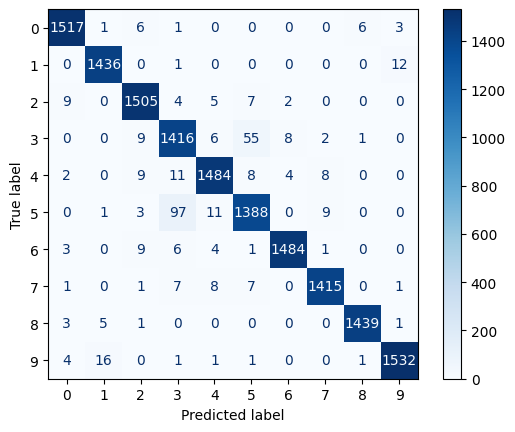

In [105]:
#Minmax scaled noisy dataset
model1.fit(X2_train, y2_train_noisy)
y_pred = model1.predict(X2_test)

print(classification_report(y2_test, y_pred, digits = 4))
cm = confusion_matrix(y2_test, y_pred, labels=class_names2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names2)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### **Logistic regression**

In [64]:
model2 = LogisticRegression(max_iter=3000)

# defining parameter range
param_grid = [{'penalty': ['l2'],
              'solver': ['newton-cg','lbfgs','sag']},
              {'penalty': ['l1', 'l2'],
              'solver': ['saga']}]

#### Evaluation on Dataset1


1. Using the original dataset

              precision    recall  f1-score   support

           0     0.9928    0.9941    0.9935      1534
           1     0.9945    0.9986    0.9966      1449
           2     0.9895    0.9889    0.9892      1532
           3     0.9629    0.9713    0.9671      1497
           4     0.9915    0.9882    0.9898      1526
           5     0.9688    0.9662    0.9675      1509
           6     0.9953    0.9907    0.9930      1508
           7     0.9903    0.9910    0.9906      1440
           8     0.9965    0.9952    0.9959      1449
           9     0.9961    0.9942    0.9952      1556

    accuracy                         0.9878     15000
   macro avg     0.9878    0.9878    0.9878     15000
weighted avg     0.9878    0.9878    0.9878     15000



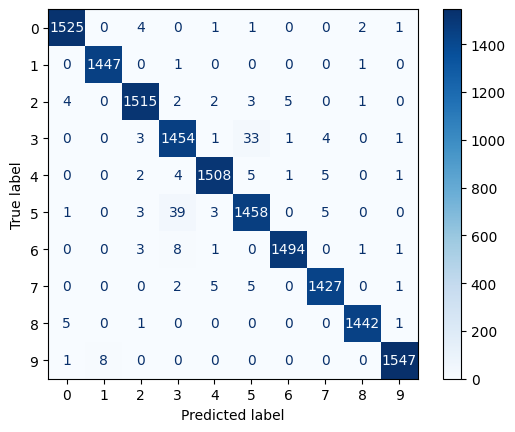

In [14]:
model2.fit(D1_X_train, D1_y_train)
y_pred = model2.predict(D1_X_test)

print(classification_report(D1_y_test, y_pred, digits = 4))
cm = confusion_matrix(D1_y_test, y_pred, labels=class_names1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names1)
disp.plot(cmap=plt.cm.Blues)
plt.show()

2. Using the preprocessed dataset

              precision    recall  f1-score   support

           0     0.9928    0.9941    0.9935      1534
           1     0.9945    0.9979    0.9962      1449
           2     0.9902    0.9889    0.9895      1532
           3     0.9668    0.9719    0.9694      1497
           4     0.9914    0.9875    0.9895      1526
           5     0.9727    0.9682    0.9704      1509
           6     0.9934    0.9927    0.9930      1508
           7     0.9896    0.9917    0.9906      1440
           8     0.9972    0.9965    0.9969      1449
           9     0.9949    0.9942    0.9945      1556

    accuracy                         0.9883     15000
   macro avg     0.9884    0.9884    0.9884     15000
weighted avg     0.9883    0.9883    0.9883     15000



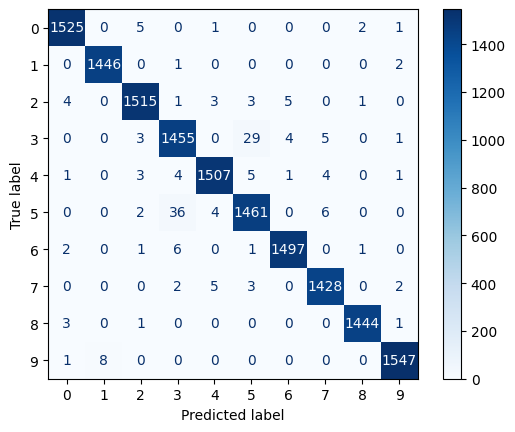

In [67]:
model2.fit(X1_train, y1_train)
y1_pred = model2.predict(X1_test)
print(classification_report(y1_test, y1_pred, digits = 4))
cm = confusion_matrix(y1_test, y1_pred, labels=class_names1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names1)
disp.plot(cmap=plt.cm.Blues)
plt.show()


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[CV 3/5] END ......penalty=l2, solver=newton-cg;, score=0.989 total time=   7.0s
[CV 2/5] END ......penalty=l2, solver=newton-cg;, score=0.988 total time=   7.0s
[CV 1/5] END ......penalty=l2, solver=newton-cg;, score=0.990 total time=   7.2s
[CV 4/5] END ......penalty=l2, solver=newton-cg;, score=0.989 total time=   7.3s
[CV 1/5] END ..........penalty=l2, solver=lbfgs;, score=0.990 total time=   7.5s
[CV 3/5] END ..........penalty=l2, solver=lbfgs;, score=0.989 total time=   8.5s
[CV 2/5] END ..........penalty=l2, solver=lbfgs;, score=0.988 total time=   8.7s
[CV 5/5] END ......penalty=l2, solver=newton-cg;, score=0.987 total time=   9.7s
[CV 4/5] END ..........penalty=l2, solver=lbfgs;, score=0.989 total time=   7.1s
[CV 5/5] END ..........penalty=l2, solver=lbfgs;, score=0.987 total time=   6.1s
[CV 1/5] END ............penalty=l2, solver=sag;, score=0.990 total time=  17.2s
[CV 2/5] END ............penalty=l2, solver=sag;, score=0.988 total time=  17.4s
[CV 3/5] END ............pen

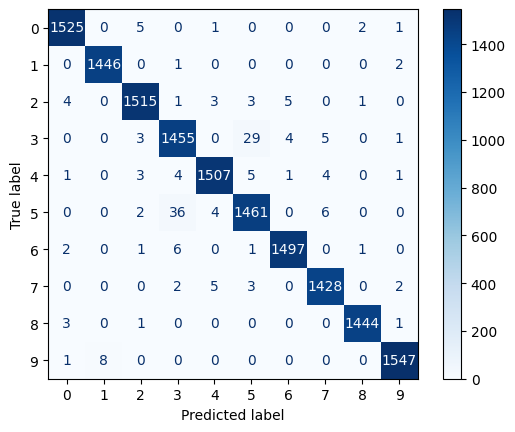

In [80]:
grid = GridSearchCV(model2, param_grid, cv = 5,scoring='accuracy', refit= True, verbose = 3, n_jobs=-1)

# fitting the model for grid search
grid.fit(X1_train, y1_train)

#Best parameters for the classifier
print("Best model: %r" %grid.best_estimator_)
print("Best classification hyper-parameters: %r" %grid.best_params_)
print("Best accuracy: %.4f" %grid.best_score_)

grid_predictions1 = grid.predict(X1_test)

print(classification_report(y1_test, grid_predictions1, digits = 4))
cm = confusion_matrix(y1_test, grid_predictions1, labels=class_names1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names1)
disp.plot(cmap=plt.cm.Blues)
plt.show()

3. Using the noisy dataset

              precision    recall  f1-score   support

           0     0.9935    0.9889    0.9912      1534
           1     0.9911    0.9972    0.9942      1449
           2     0.9856    0.9863    0.9860      1532
           3     0.9616    0.9713    0.9664      1497
           4     0.9895    0.9849    0.9872      1526
           5     0.9713    0.9655    0.9684      1509
           6     0.9920    0.9894    0.9907      1508
           7     0.9896    0.9917    0.9906      1440
           8     0.9938    0.9965    0.9952      1449
           9     0.9948    0.9916    0.9932      1556

    accuracy                         0.9863     15000
   macro avg     0.9863    0.9863    0.9863     15000
weighted avg     0.9863    0.9863    0.9863     15000



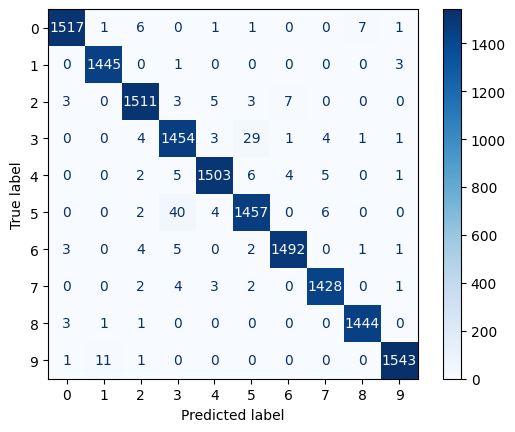

In [84]:
model2.fit(D1_X_train, D1y_train_noisy)
y_pred = model2.predict(D1_X_test)

print(classification_report(D1_y_test, y_pred, digits = 4))
cm = confusion_matrix(D1_y_test, y_pred, labels=class_names1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names1)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### Evaluation on Dataset2


1. Using the original dataset

              precision    recall  f1-score   support

           0     0.9902    0.9870    0.9886      1534
           1     0.9863    0.9924    0.9893      1449
           2     0.9728    0.9817    0.9773      1532
           3     0.9128    0.9365    0.9245      1497
           4     0.9750    0.9705    0.9727      1526
           5     0.9411    0.9211    0.9310      1509
           6     0.9880    0.9788    0.9833      1508
           7     0.9868    0.9826    0.9847      1440
           8     0.9938    0.9931    0.9934      1449
           9     0.9859    0.9878    0.9868      1556

    accuracy                         0.9731     15000
   macro avg     0.9733    0.9732    0.9732     15000
weighted avg     0.9732    0.9731    0.9731     15000



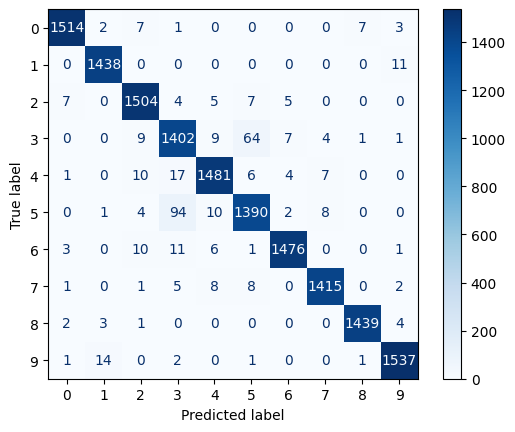

In [69]:
model2.fit(D2_X_train, D2_y_train)
y_pred = model2.predict(D2_X_test)

print(classification_report(D2_y_test, y_pred, digits = 4))
cm = confusion_matrix(D2_y_test, y_pred, labels=class_names2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names2)
disp.plot(cmap=plt.cm.Blues)
plt.show()

2. Using the preprocessed dataset

              precision    recall  f1-score   support

           0     0.9908    0.9876    0.9892      1534
           1     0.9856    0.9924    0.9890      1449
           2     0.9729    0.9830    0.9779      1532
           3     0.9132    0.9419    0.9273      1497
           4     0.9750    0.9699    0.9724      1526
           5     0.9468    0.9205    0.9335      1509
           6     0.9893    0.9828    0.9860      1508
           7     0.9861    0.9833    0.9847      1440
           8     0.9938    0.9938    0.9938      1449
           9     0.9897    0.9871    0.9884      1556

    accuracy                         0.9741     15000
   macro avg     0.9743    0.9742    0.9742     15000
weighted avg     0.9743    0.9741    0.9742     15000



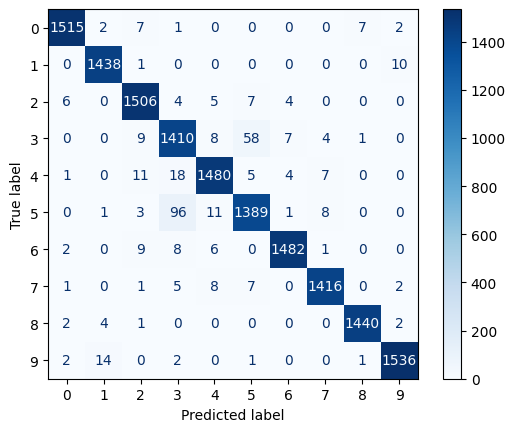

In [84]:
model2.fit(X2_train,y2_train)
y2_pred = model2.predict(X2_test)
print(classification_report(y2_test, y2_pred, digits = 4))
cm = confusion_matrix(y2_test, y2_pred, labels=class_names2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names2)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[CV 2/5] END ......penalty=l2, solver=newton-cg;, score=0.972 total time= 3.6min
[CV 3/5] END ......penalty=l2, solver=newton-cg;, score=0.972 total time= 4.0min
[CV 4/5] END ......penalty=l2, solver=newton-cg;, score=0.974 total time= 4.1min
[CV 1/5] END ......penalty=l2, solver=newton-cg;, score=0.973 total time= 4.2min
[CV 1/5] END ..........penalty=l2, solver=lbfgs;, score=0.972 total time= 2.9min
[CV 5/5] END ......penalty=l2, solver=newton-cg;, score=0.971 total time= 3.4min
[CV 2/5] END ..........penalty=l2, solver=lbfgs;, score=0.972 total time= 3.0min
[CV 3/5] END ..........penalty=l2, solver=lbfgs;, score=0.972 total time= 2.9min
[CV 4/5] END ..........penalty=l2, solver=lbfgs;, score=0.974 total time= 2.5min
[CV 5/5] END ..........penalty=l2, solver=lbfgs;, score=0.971 total time= 2.7min
[CV 4/5] END ............penalty=l2, solver=sag;, score=0.974 total time=11.4min
[CV 1/5] END ............penalty=l2, solver=sag;, score=0.973 total time=15.0min
[CV 3/5] END ............pen

/Users/ya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..........penalty=l1, solver=saga;, score=0.972 total time=243.5min


/Users/ya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..........penalty=l1, solver=saga;, score=0.975 total time=244.4min


/Users/ya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..........penalty=l1, solver=saga;, score=0.970 total time=244.4min


/Users/ya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..........penalty=l1, solver=saga;, score=0.975 total time=247.6min
[CV 1/5] END ...........penalty=l2, solver=saga;, score=0.973 total time=26.0min
[CV 2/5] END ...........penalty=l2, solver=saga;, score=0.972 total time=25.2min
[CV 3/5] END ...........penalty=l2, solver=saga;, score=0.972 total time=24.7min
[CV 4/5] END ...........penalty=l2, solver=saga;, score=0.974 total time=21.0min
[CV 5/5] END ...........penalty=l2, solver=saga;, score=0.971 total time=22.6min


/Users/ya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..........penalty=l1, solver=saga;, score=0.971 total time=143.5min


/Users/ya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best model: LogisticRegression(max_iter=3000, penalty='l1', solver='saga')
Best classification hyper-parameters: {'penalty': 'l1', 'solver': 'saga'}
Best accuracy: 0.9727
              precision    recall  f1-score   support

           0     0.9883    0.9870    0.9876      1534
           1     0.9856    0.9910    0.9883      1449
           2     0.9729    0.9830    0.9779      1532
           3     0.9156    0.9426    0.9289      1497
           4     0.9750    0.9705    0.9727      1526
           5     0.9431    0.9218    0.9323      1509
           6     0.9900    0.9821    0.9860      1508
           7     0.9874    0.9826    0.9850      1440
           8     0.9945    0.9938    0.9941      1449
           9     0.9897    0.9865    0.9881      1556

    accuracy                         0.9740     15000
   macro avg     0.9742    0.9741    0.9741     15000
weighted avg     0.9741    0.9740    0.9740     15000



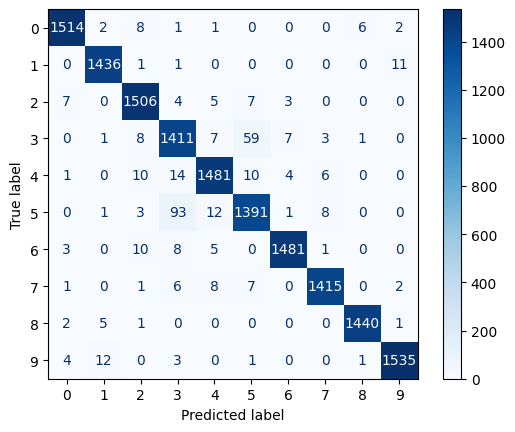

In [85]:
grid = GridSearchCV(model2, param_grid, cv = 5,scoring='accuracy', refit= True, verbose = 3, n_jobs=-1)

# fitting the model for grid search
grid.fit(X2_train, y2_train)

#Best parameters for the classifier
print("Best model: %r" %grid.best_estimator_)
print("Best classification hyper-parameters: %r" %grid.best_params_)
print("Best accuracy: %.4f" %grid.best_score_)

grid_predictions2 = grid.predict(X2_test)

print(classification_report(y2_test, grid_predictions2, digits = 4))
cm = confusion_matrix(y2_test, grid_predictions2, labels=class_names2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names2)
disp.plot(cmap=plt.cm.Blues)
plt.show()

3. Using the noisy dataset

              precision    recall  f1-score   support

           0     0.9818    0.9850    0.9834      1534
           1     0.9829    0.9903    0.9866      1449
           2     0.9683    0.9778    0.9730      1532
           3     0.9113    0.9405    0.9257      1497
           4     0.9685    0.9659    0.9672      1526
           5     0.9443    0.9105    0.9271      1509
           6     0.9833    0.9761    0.9797      1508
           7     0.9799    0.9812    0.9806      1440
           8     0.9917    0.9938    0.9928      1449
           9     0.9890    0.9794    0.9842      1556

    accuracy                         0.9699     15000
   macro avg     0.9701    0.9701    0.9700     15000
weighted avg     0.9700    0.9699    0.9699     15000



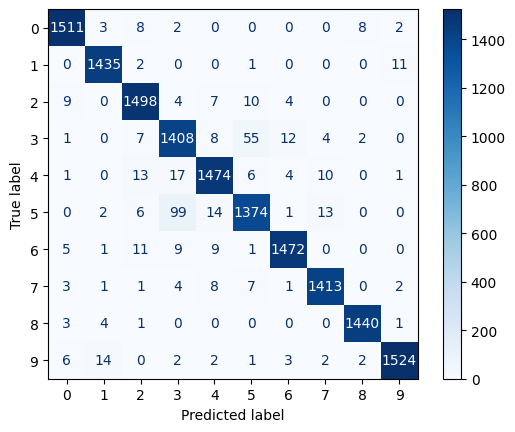

In [85]:
model2.fit(D2_X_train, D2y_train_noisy)
y_pred = model2.predict(D2_X_test)

print(classification_report(D2_y_test, y_pred, digits = 4))
cm = confusion_matrix(D2_y_test, y_pred, labels=class_names2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names2)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### **Random Forest**

In [59]:
# initializing random forest
model3 = RandomForestClassifier()

# grid search cv
grid_space= {'max_depth':[3,5,10],
              'n_estimators':[10,100,200,400],
              'max_features':[4,8,'sqrt'],
              'min_samples_leaf':[1,2,4],
              'min_samples_split':[2,5]
             }

#### Evaluation on Dataset1


1. Using the original dataset





              precision    recall  f1-score   support

           0     0.9909    0.9922    0.9915      1534
           1     0.9938    0.9979    0.9959      1449
           2     0.9915    0.9863    0.9889      1532
           3     0.9599    0.9753    0.9675      1497
           4     0.9901    0.9869    0.9885      1526
           5     0.9713    0.9649    0.9681      1509
           6     0.9934    0.9914    0.9924      1508
           7     0.9903    0.9910    0.9906      1440
           8     0.9972    0.9952    0.9962      1449
           9     0.9968    0.9942    0.9955      1556

    accuracy                         0.9875     15000
   macro avg     0.9875    0.9875    0.9875     15000
weighted avg     0.9875    0.9875    0.9875     15000



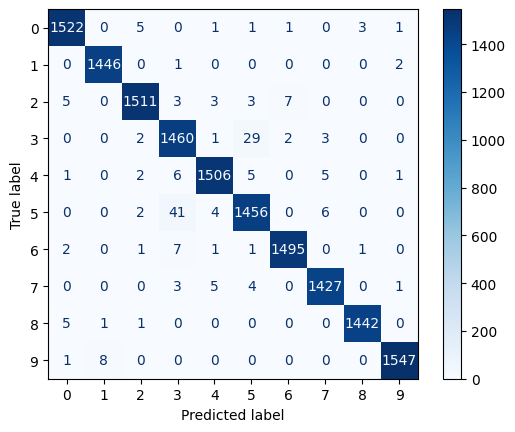

In [17]:
model3.fit(D1_X_train, D1_y_train)

rf_pred = model3.predict(D1_X_test)

# print classification report
print(classification_report(D1_y_test, rf_pred, digits = 4))
cm = confusion_matrix(D1_y_test, rf_pred, labels=class_names1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names1)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [92]:
rf_grid = GridSearchCV(model3, param_grid=grid_space, refit = True, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(D1_X_train, D1_y_train)

# grid search results
print("Best model: %r" %rf_grid.best_estimator_)
print("Best classification hyper-parameters: %r" %rf_grid.best_params_)
print("Best accuracy: %.4f" %rf_grid.best_score_)

Best model: RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200)
Best classification hyper-parameters: {'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best accuracy: 0.9880


              precision    recall  f1-score   support

           0     0.9935    0.9928    0.9932      1534
           1     0.9945    0.9972    0.9959      1449
           2     0.9902    0.9869    0.9886      1532
           3     0.9567    0.9753    0.9659      1497
           4     0.9902    0.9889    0.9895      1526
           5     0.9738    0.9602    0.9670      1509
           6     0.9914    0.9901    0.9907      1508
           7     0.9889    0.9896    0.9892      1440
           8     0.9972    0.9972    0.9972      1449
           9     0.9961    0.9942    0.9952      1556

    accuracy                         0.9872     15000
   macro avg     0.9872    0.9872    0.9872     15000
weighted avg     0.9872    0.9872    0.9872     15000



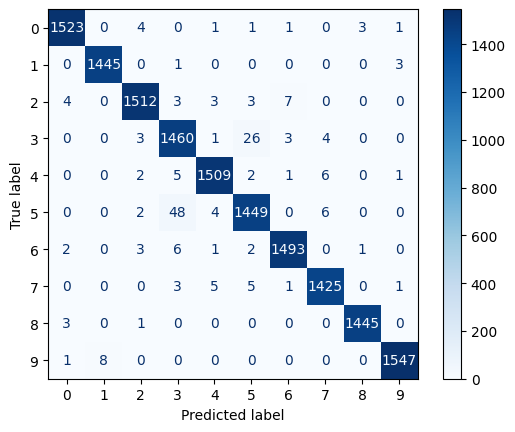

In [93]:
rf_grid_predictions1 = rf_grid.predict(D1_X_test)

# print classification report
print(classification_report(D1_y_test, rf_grid_predictions1, digits = 4))
cm = confusion_matrix(D1_y_test, rf_grid_predictions1, labels=class_names1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names1)
disp.plot(cmap=plt.cm.Blues)
plt.show()

2. Using the preprocessed dataset

In [94]:
rf_grid = GridSearchCV(model3, param_grid=grid_space, refit = True, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X1_train, y1_train)

# grid search results
print("Best model: %r" %rf_grid.best_estimator_)
print("Best classification hyper-parameters: %r" %rf_grid.best_params_)
print("Best accuracy: %.4f" %rf_grid.best_score_)



Best model: RandomForestClassifier(max_depth=10, max_features=4, min_samples_split=5,
                       n_estimators=400)
Best classification hyper-parameters: {'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}
Best accuracy: 0.9882


              precision    recall  f1-score   support

           0     0.9941    0.9935    0.9938      1534
           1     0.9931    0.9979    0.9955      1449
           2     0.9895    0.9876    0.9886      1532
           3     0.9561    0.9753    0.9656      1497
           4     0.9895    0.9889    0.9892      1526
           5     0.9745    0.9609    0.9676      1509
           6     0.9933    0.9901    0.9917      1508
           7     0.9924    0.9910    0.9917      1440
           8     0.9966    0.9979    0.9972      1449
           9     0.9968    0.9929    0.9948      1556

    accuracy                         0.9875     15000
   macro avg     0.9876    0.9876    0.9876     15000
weighted avg     0.9876    0.9875    0.9875     15000



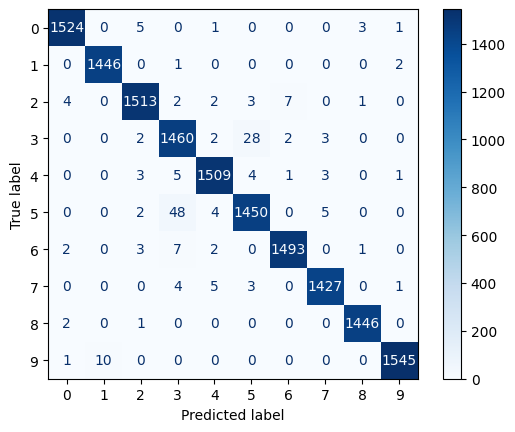

In [95]:
rf_grid_predictions1 = rf_grid.predict(X1_test)

# print classification report
print(classification_report(y1_test, rf_grid_predictions1, digits = 4))
cm = confusion_matrix(y1_test, rf_grid_predictions1, labels=class_names1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names1)
disp.plot(cmap=plt.cm.Blues)
plt.show()

3. Using the noisy dataset

              precision    recall  f1-score   support

           0     0.9909    0.9896    0.9902      1534
           1     0.9931    0.9979    0.9955      1449
           2     0.9902    0.9850    0.9876      1532
           3     0.9587    0.9760    0.9672      1497
           4     0.9908    0.9869    0.9888      1526
           5     0.9725    0.9622    0.9674      1509
           6     0.9927    0.9914    0.9920      1508
           7     0.9889    0.9910    0.9899      1440
           8     0.9945    0.9945    0.9945      1449
           9     0.9955    0.9936    0.9945      1556

    accuracy                         0.9867     15000
   macro avg     0.9868    0.9868    0.9868     15000
weighted avg     0.9868    0.9867    0.9867     15000



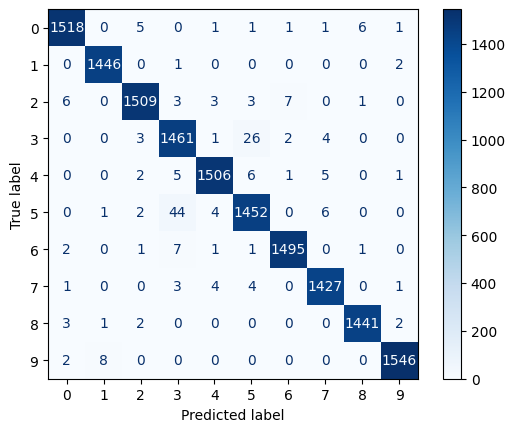

In [86]:
model3.fit(D1_X_train, D1y_train_noisy)

rf_pred = model3.predict(D1_X_test)

# print classification report
print(classification_report(D1_y_test, rf_pred, digits = 4))
cm = confusion_matrix(D1_y_test, rf_pred, labels=class_names1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names1)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### Evaluation on Dataset2


1. Using the original dataset

              precision    recall  f1-score   support

           0     0.9863    0.9876    0.9870      1534
           1     0.9849    0.9917    0.9883      1449
           2     0.9748    0.9830    0.9789      1532
           3     0.9100    0.9452    0.9273      1497
           4     0.9763    0.9738    0.9751      1526
           5     0.9500    0.9185    0.9340      1509
           6     0.9893    0.9814    0.9854      1508
           7     0.9888    0.9819    0.9854      1440
           8     0.9938    0.9938    0.9938      1449
           9     0.9910    0.9865    0.9887      1556

    accuracy                         0.9743     15000
   macro avg     0.9745    0.9744    0.9744     15000
weighted avg     0.9745    0.9743    0.9743     15000



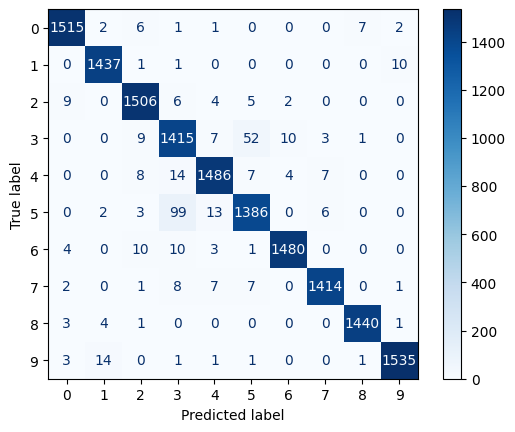

In [97]:
model3.fit(D2_X_train, D2_y_train)

rf_pred = model3.predict(D2_X_test)

# print classification report
print(classification_report(D2_y_test, rf_pred, digits = 4))
cm = confusion_matrix(D2_y_test, rf_pred, labels=class_names2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names2)
disp.plot(cmap=plt.cm.Blues)
plt.show()

2. Using the preprocessed dataset

In [98]:
rf_grid = GridSearchCV(model3, param_grid=grid_space, refit = True, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X2_train, y2_train)

# grid search results
print("Best model: %r" %rf_grid.best_estimator_)
print("Best classification hyper-parameters: %r" %rf_grid.best_params_)
print("Best accuracy: %.4f" %rf_grid.best_score_)

Best model: RandomForestClassifier(max_depth=10, max_features=8, n_estimators=400)
Best classification hyper-parameters: {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best accuracy: 0.9729


              precision    recall  f1-score   support

           0     0.9850    0.9876    0.9863      1534
           1     0.9876    0.9910    0.9893      1449
           2     0.9754    0.9817    0.9785      1532
           3     0.9055    0.9539    0.9291      1497
           4     0.9757    0.9725    0.9741      1526
           5     0.9564    0.9152    0.9353      1509
           6     0.9906    0.9808    0.9857      1508
           7     0.9888    0.9826    0.9857      1440
           8     0.9945    0.9931    0.9938      1449
           9     0.9891    0.9871    0.9881      1556

    accuracy                         0.9745     15000
   macro avg     0.9749    0.9746    0.9746     15000
weighted avg     0.9748    0.9745    0.9745     15000



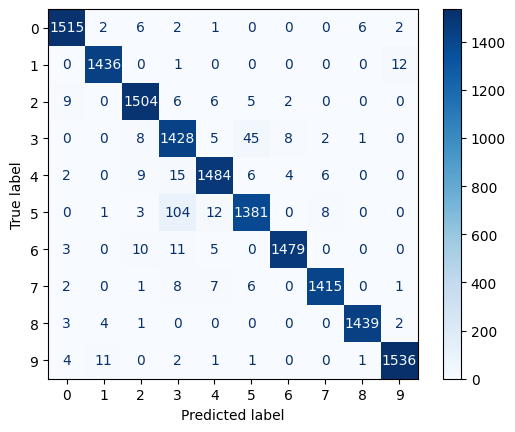

In [99]:
rf_grid_predictions2 = rf_grid.predict(X2_test)

# print classification report
print(classification_report(y2_test, rf_grid_predictions2, digits = 4))
cm = confusion_matrix(y2_test, rf_grid_predictions2, labels=class_names2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names2)
disp.plot(cmap=plt.cm.Blues)
plt.show()

3. Using the noisy dataset

              precision    recall  f1-score   support

           0     0.9857    0.9863    0.9860      1534
           1     0.9842    0.9917    0.9880      1449
           2     0.9703    0.9824    0.9763      1532
           3     0.9091    0.9426    0.9255      1497
           4     0.9775    0.9679    0.9727      1526
           5     0.9435    0.9178    0.9305      1509
           6     0.9880    0.9794    0.9837      1508
           7     0.9888    0.9826    0.9857      1440
           8     0.9931    0.9924    0.9928      1449
           9     0.9890    0.9846    0.9868      1556

    accuracy                         0.9727     15000
   macro avg     0.9729    0.9728    0.9728     15000
weighted avg     0.9729    0.9727    0.9727     15000



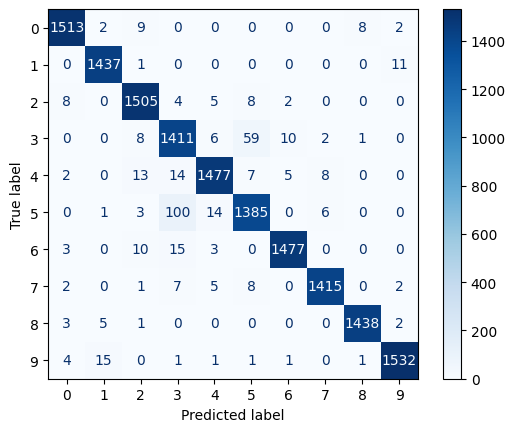

In [87]:
model3.fit(D2_X_train, D2y_train_noisy)

rf_pred = model3.predict(D2_X_test)

# print classification report
print(classification_report(D2_y_test, rf_pred, digits = 4))
cm = confusion_matrix(D2_y_test, rf_pred, labels=class_names2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names2)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### **Gaussian Naive Bayes**

In [62]:
model4 = GaussianNB()

#### Evaluation on Dataset1


1. Using the original dataset

              precision    recall  f1-score   support

           0     0.9902    0.9902    0.9902      1534
           1     0.9897    0.9959    0.9928      1449
           2     0.9805    0.9843    0.9824      1532
           3     0.8741    0.9833    0.9255      1497
           4     0.9848    0.9771    0.9809      1526
           5     0.9839    0.8900    0.9346      1509
           6     0.9959    0.9775    0.9866      1508
           7     0.9874    0.9826    0.9850      1440
           8     0.9938    0.9965    0.9952      1449
           9     0.9968    0.9871    0.9919      1556

    accuracy                         0.9763     15000
   macro avg     0.9777    0.9765    0.9765     15000
weighted avg     0.9777    0.9763    0.9765     15000



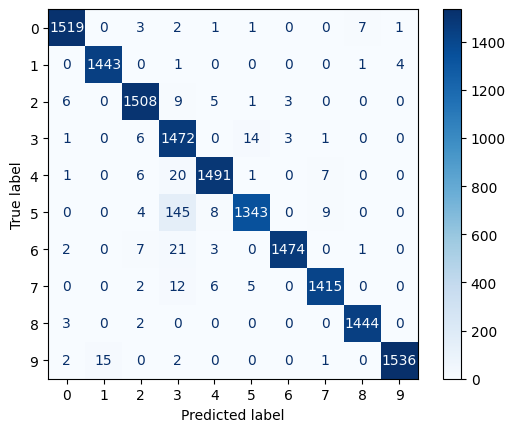

In [20]:
model4.fit(D1_X_train, D1_y_train)

GNB_y1_pred = model4.predict(D1_X_test)
print(classification_report(D1_y_test, GNB_y1_pred, digits = 4))
cm = confusion_matrix(D1_y_test, GNB_y1_pred, labels=class_names1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names1)
disp.plot(cmap=plt.cm.Blues)
plt.show()

2. Using the preprocessed dataset

              precision    recall  f1-score   support

           0     0.9902    0.9902    0.9902      1534
           1     0.9884    0.9959    0.9921      1449
           2     0.9824    0.9830    0.9827      1532
           3     0.8344    0.9860    0.9039      1497
           4     0.9848    0.9758    0.9803      1526
           5     0.9869    0.8489    0.9127      1509
           6     0.9966    0.9728    0.9846      1508
           7     0.9881    0.9812    0.9847      1440
           8     0.9938    0.9965    0.9952      1449
           9     0.9968    0.9859    0.9913      1556

    accuracy                         0.9715     15000
   macro avg     0.9742    0.9716    0.9718     15000
weighted avg     0.9743    0.9715    0.9717     15000



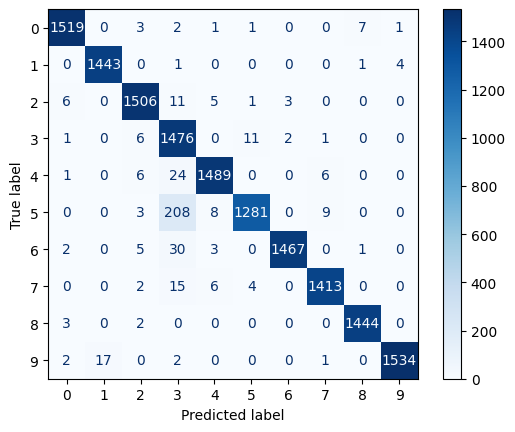

In [85]:
model4.fit(X1_train,y1_train)

GNB_y1_pred = model4.predict(X1_test)
print(classification_report(y1_test, GNB_y1_pred, digits = 4))
cm = confusion_matrix(y1_test, GNB_y1_pred, labels=class_names1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names1)
disp.plot(cmap=plt.cm.Blues)
plt.show()

3. Using the noisy dataset

              precision    recall  f1-score   support

           0     0.9895    0.9876    0.9886      1534
           1     0.9911    0.9979    0.9945      1449
           2     0.9836    0.9817    0.9827      1532
           3     0.9416    0.9686    0.9549      1497
           4     0.9654    0.9882    0.9767      1526
           5     0.9825    0.9278    0.9543      1509
           6     0.9854    0.9841    0.9847      1508
           7     0.9875    0.9896    0.9886      1440
           8     0.9925    0.9979    0.9952      1449
           9     0.9942    0.9891    0.9916      1556

    accuracy                         0.9811     15000
   macro avg     0.9813    0.9813    0.9812     15000
weighted avg     0.9813    0.9811    0.9811     15000



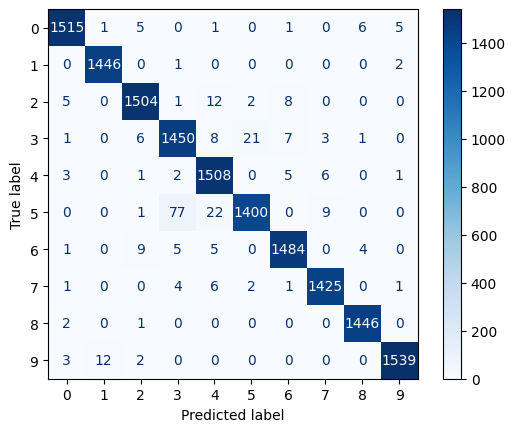

In [88]:
model4.fit(D1_X_train, D1y_train_noisy)

GNB_y1_pred = model4.predict(D1_X_test)
print(classification_report(D1_y_test, GNB_y1_pred, digits = 4))
cm = confusion_matrix(D1_y_test, GNB_y1_pred, labels=class_names1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names1)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### Evaluation on Dataset2


1. Using the original dataset

              precision    recall  f1-score   support

           0     0.9780    0.9870    0.9825      1534
           1     0.9903    0.9890    0.9896      1449
           2     0.9702    0.9785    0.9743      1532
           3     0.8839    0.9412    0.9117      1497
           4     0.9718    0.9699    0.9708      1526
           5     0.9456    0.8993    0.9219      1509
           6     0.9899    0.9715    0.9806      1508
           7     0.9868    0.9847    0.9857      1440
           8     0.9951    0.9896    0.9924      1449
           9     0.9890    0.9852    0.9871      1556

    accuracy                         0.9695     15000
   macro avg     0.9701    0.9696    0.9697     15000
weighted avg     0.9700    0.9695    0.9696     15000



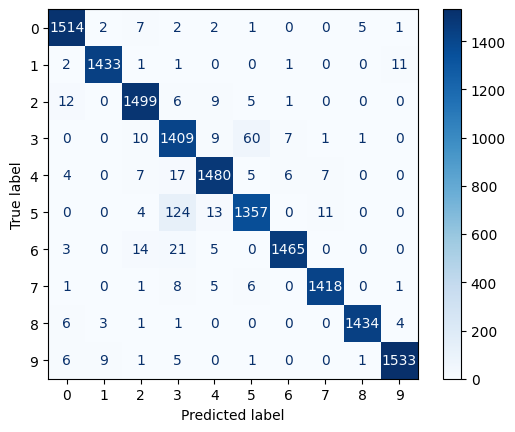

In [87]:
model4.fit(D2_X_train, D2_y_train)

GNB_y2_pred = model4.predict(D2_X_test)
print(classification_report(D2_y_test, GNB_y2_pred, digits = 4))
cm = confusion_matrix(D2_y_test, GNB_y2_pred, labels=class_names2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names2)
disp.plot(cmap=plt.cm.Blues)
plt.show()

2. Using the preprocessed dataset

              precision    recall  f1-score   support

           0     0.9761    0.9863    0.9812      1534
           1     0.9896    0.9890    0.9893      1449
           2     0.9702    0.9765    0.9733      1532
           3     0.8880    0.9372    0.9119      1497
           4     0.9705    0.9692    0.9698      1526
           5     0.9439    0.9026    0.9228      1509
           6     0.9892    0.9728    0.9809      1508
           7     0.9854    0.9847    0.9851      1440
           8     0.9951    0.9890    0.9920      1449
           9     0.9884    0.9852    0.9868      1556

    accuracy                         0.9691     15000
   macro avg     0.9696    0.9692    0.9693     15000
weighted avg     0.9695    0.9691    0.9692     15000



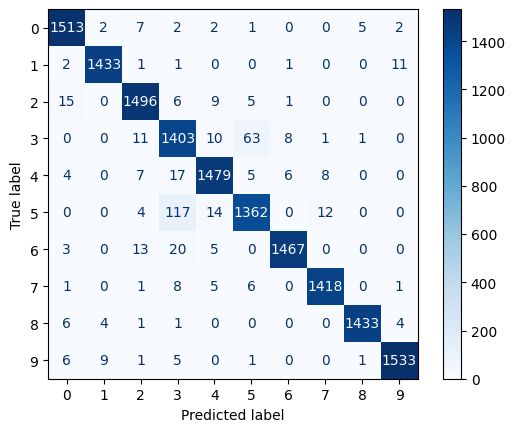

In [88]:
model4.fit(X2_train,y2_train)

GNB_y2_pred = model4.predict(X2_test)
print(classification_report(y2_test, GNB_y2_pred, digits = 4))
cm = confusion_matrix(y2_test, GNB_y2_pred, labels=class_names2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names2)
disp.plot(cmap=plt.cm.Blues)
plt.show()

3. Using the noisy dataset

              precision    recall  f1-score   support

           0     0.9756    0.9889    0.9822      1534
           1     0.9815    0.9910    0.9863      1449
           2     0.9841    0.9713    0.9777      1532
           3     0.8815    0.9439    0.9116      1497
           4     0.9699    0.9705    0.9702      1526
           5     0.9593    0.8748    0.9151      1509
           6     0.9719    0.9861    0.9789      1508
           7     0.9854    0.9833    0.9844      1440
           8     0.9945    0.9896    0.9920      1449
           9     0.9865    0.9859    0.9862      1556

    accuracy                         0.9684     15000
   macro avg     0.9690    0.9685    0.9685     15000
weighted avg     0.9689    0.9684    0.9684     15000



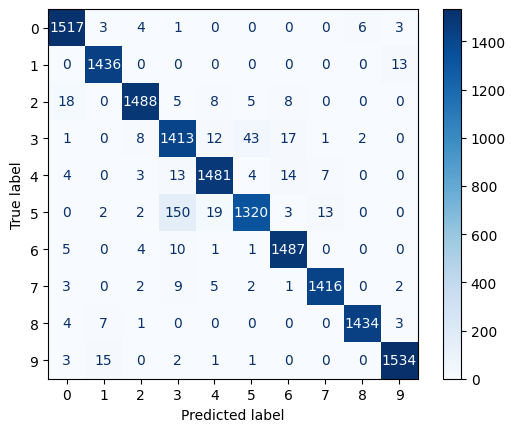

In [89]:
model4.fit(D2_X_train, D2y_train_noisy)

GNB_y2_pred = model4.predict(D2_X_test)
print(classification_report(D2_y_test, GNB_y2_pred, digits = 4))
cm = confusion_matrix(D2_y_test, GNB_y2_pred, labels=class_names2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names2)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### **AdaBoost with different base classifiers**

In [12]:
classifier1 = GaussianNB()
classifier2 = DecisionTreeClassifier()

adaboost_classifier = AdaBoostClassifier(
    estimator=classifier1,
    n_estimators=200,
    learning_rate=1.0,
    algorithm= 'SAMME' ,
    random_state=10
    )

boosting_params = {
  'learning_rate': [0.4, 0.8, 1],
  'n_estimators': [20, 100, 150, 200]
  }

#### Evaluation on Dataset1

1. Using the original dataset

              precision    recall  f1-score   support

           0     0.9902    0.9902    0.9902      1534
           1     0.9897    0.9959    0.9928      1449
           2     0.9805    0.9843    0.9824      1532
           3     0.8741    0.9833    0.9255      1497
           4     0.9848    0.9771    0.9809      1526
           5     0.9839    0.8900    0.9346      1509
           6     0.9959    0.9775    0.9866      1508
           7     0.9874    0.9826    0.9850      1440
           8     0.9938    0.9965    0.9952      1449
           9     0.9968    0.9871    0.9919      1556

    accuracy                         0.9763     15000
   macro avg     0.9777    0.9765    0.9765     15000
weighted avg     0.9777    0.9763    0.9765     15000



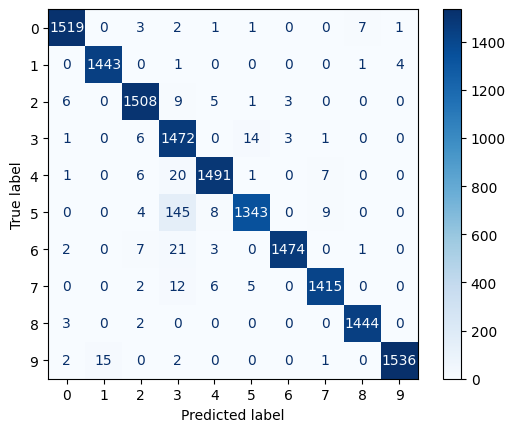

In [13]:
adaboost_classifier.fit(D1_X_train, D1_y_train)
ada_pred1 = adaboost_classifier.predict(D1_X_test)

print(classification_report(D1_y_test, ada_pred1, digits = 4))
cm = confusion_matrix(D1_y_test, ada_pred1 , labels=class_names1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names1)
disp.plot(cmap=plt.cm.Blues)
plt.show()

2. Using the preprocessed dataset

In [14]:
adaboost_classifier.fit(X1_train,y1_train)
ada_pred1 = adaboost_classifier.predict(X1_test)
print(classification_report(y1_test, ada_pred1, digits = 4))


              precision    recall  f1-score   support

           0     0.9896    0.9902    0.9899      1534
           1     0.9863    0.9959    0.9911      1449
           2     0.9830    0.9817    0.9824      1532
           3     0.8178    0.9866    0.8943      1497
           4     0.9809    0.9758    0.9783      1526
           5     0.9873    0.8244    0.8985      1509
           6     0.9966    0.9715    0.9839      1508
           7     0.9888    0.9812    0.9850      1440
           8     0.9938    0.9965    0.9952      1449
           9     0.9967    0.9839    0.9903      1556

    accuracy                         0.9686     15000
   macro avg     0.9721    0.9688    0.9689     15000
weighted avg     0.9721    0.9686    0.9688     15000



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END learning_rate=0.4, n_estimators=20;, score=0.966 total time=  12.0s
[CV 2/5] END learning_rate=0.4, n_estimators=20;, score=0.967 total time=   9.5s
[CV 3/5] END learning_rate=0.4, n_estimators=20;, score=0.967 total time=   9.6s
[CV 4/5] END learning_rate=0.4, n_estimators=20;, score=0.968 total time=  10.5s
[CV 5/5] END learning_rate=0.4, n_estimators=20;, score=0.961 total time=   8.5s
[CV 1/5] END learning_rate=0.4, n_estimators=100;, score=0.966 total time=   7.9s
[CV 2/5] END learning_rate=0.4, n_estimators=100;, score=0.967 total time=  10.5s
[CV 3/5] END learning_rate=0.4, n_estimators=100;, score=0.967 total time=   8.4s
[CV 4/5] END learning_rate=0.4, n_estimators=100;, score=0.968 total time=   5.5s
[CV 5/5] END learning_rate=0.4, n_estimators=100;, score=0.961 total time=   8.6s
[CV 1/5] END learning_rate=0.4, n_estimators=150;, score=0.966 total time=   6.1s
[CV 2/5] END learning_rate=0.4, n_estimato

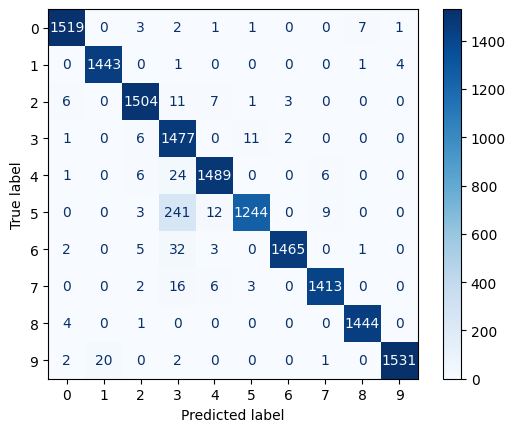

In [20]:

grid_search_boosting = GridSearchCV(
    adaboost_classifier,
    boosting_params,
    scoring='accuracy',
    cv=5,
    return_train_score=False,
    verbose=3
)

grid_search_boosting.fit(X1_train, y1_train)

#Best parameters for the classifier
print("Best model: %r" %grid_search_boosting.best_estimator_)
print("Best classification hyper-parameters for boosting classifier: %r" %grid_search_boosting.best_params_)
#print("Best accuracy: %.4f" %grid_search_boosting.best_score_)

boosting_predictions1 = grid_search_boosting.predict(X1_test)

# print classification report
print(classification_report(y1_test, boosting_predictions1 , digits = 4))
cm = confusion_matrix(y1_test, boosting_predictions1 , labels=class_names1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names1)
disp.plot(cmap=plt.cm.Blues)
plt.show()

3. Using the noisy dataset

              precision    recall  f1-score   support

           0     0.9928    0.9922    0.9925      1534
           1     0.9925    0.9979    0.9952      1449
           2     0.9837    0.9869    0.9853      1532
           3     0.9195    0.9773    0.9475      1497
           4     0.9786    0.9882    0.9834      1526
           5     0.9885    0.9099    0.9476      1509
           6     0.9894    0.9881    0.9887      1508
           7     0.9882    0.9903    0.9892      1440
           8     0.9938    0.9965    0.9952      1449
           9     0.9968    0.9929    0.9948      1556

    accuracy                         0.9819     15000
   macro avg     0.9824    0.9820    0.9819     15000
weighted avg     0.9824    0.9819    0.9819     15000



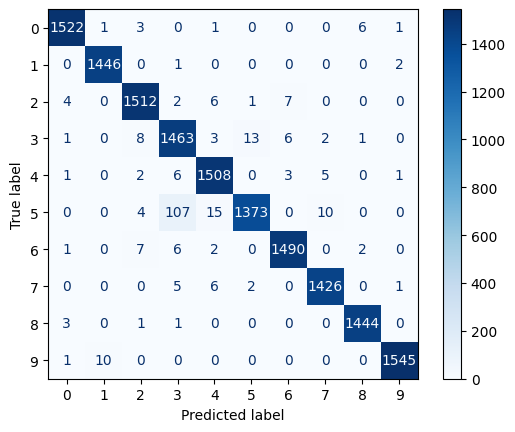

In [15]:
adaboost_classifier.fit(D1_X_train, D1y_train_noisy)
ada_pred1 = adaboost_classifier.predict(D1_X_test)

print(classification_report(D1_y_test, ada_pred1, digits = 4))
cm = confusion_matrix(D1_y_test, ada_pred1 , labels=class_names1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names1)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### Evaluation on Dataset2


1. Using the original dataset

              precision    recall  f1-score   support

           0     0.9780    0.9870    0.9825      1534
           1     0.9903    0.9890    0.9896      1449
           2     0.9702    0.9785    0.9743      1532
           3     0.8839    0.9412    0.9117      1497
           4     0.9718    0.9699    0.9708      1526
           5     0.9456    0.8993    0.9219      1509
           6     0.9899    0.9715    0.9806      1508
           7     0.9868    0.9847    0.9857      1440
           8     0.9951    0.9896    0.9924      1449
           9     0.9890    0.9852    0.9871      1556

    accuracy                         0.9695     15000
   macro avg     0.9701    0.9696    0.9697     15000
weighted avg     0.9700    0.9695    0.9696     15000



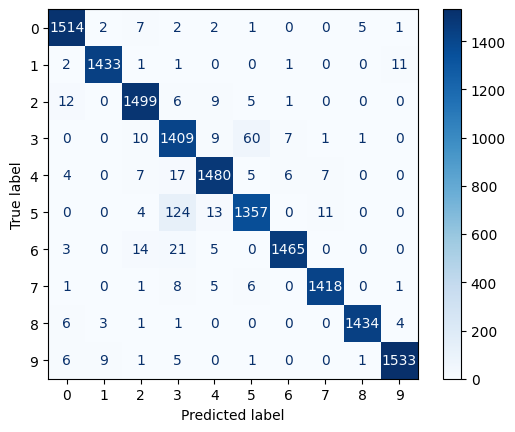

In [16]:
adaboost_classifier.fit(D2_X_train, D2_y_train)
ada_pred2 = adaboost_classifier.predict(D2_X_test)

print(classification_report(D2_y_test, ada_pred2, digits = 4))
cm = confusion_matrix(D2_y_test, ada_pred2, labels=class_names2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names2)
disp.plot(cmap=plt.cm.Blues)
plt.show()

2. Using the preprocessed dataset

In [17]:
adaboost_classifier.fit(X2_train,y2_train)
ada_pred2 = adaboost_classifier.predict(X2_test)
print(classification_report(y2_test, ada_pred2, digits = 4))


              precision    recall  f1-score   support

           0     0.9755    0.9870    0.9812      1534
           1     0.9896    0.9890    0.9893      1449
           2     0.9714    0.9765    0.9740      1532
           3     0.8911    0.9345    0.9123      1497
           4     0.9686    0.9692    0.9689      1526
           5     0.9420    0.9046    0.9229      1509
           6     0.9879    0.9721    0.9799      1508
           7     0.9847    0.9847    0.9847      1440
           8     0.9951    0.9890    0.9920      1449
           9     0.9890    0.9852    0.9871      1556

    accuracy                         0.9691     15000
   macro avg     0.9695    0.9692    0.9692     15000
weighted avg     0.9694    0.9691    0.9691     15000



In [ ]:
grid_search_boosting = GridSearchCV(
    adaboost_classifier,
    boosting_params,
    scoring='accuracy',
    cv=5,
    return_train_score=False,
    verbose=3
)

grid_search_boosting.fit(X2_train, y2_train)

#Best parameters for the classifier
print("Best model: %r" %grid_search_boosting.best_estimator_)
print("Best classification hyper-parameters for boosting classifier: %r" %grid_search_boosting.best_params_)
print("Best accuracy: %.4f" %grid_search_boosting.best_score_)


boosting_predictions2 = grid_search_boosting.predict(X2_test)

# print classification report
print(classification_report(y2_test, boosting_predictions2 , digits = 4))
cm = confusion_matrix(y2_test, boosting_predictions2 , labels=class_names2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names2)
disp.plot(cmap=plt.cm.Blues)
plt.show()

3. Using the noisy dataset

              precision    recall  f1-score   support

           0     0.9748    0.9817    0.9782      1534
           1     0.9816    0.9924    0.9870      1449
           2     0.9802    0.9674    0.9737      1532
           3     0.8698    0.9506    0.9084      1497
           4     0.9736    0.9685    0.9711      1526
           5     0.9584    0.8708    0.9125      1509
           6     0.9705    0.9814    0.9759      1508
           7     0.9840    0.9833    0.9837      1440
           8     0.9938    0.9910    0.9924      1449
           9     0.9877    0.9801    0.9839      1556

    accuracy                         0.9665     15000
   macro avg     0.9674    0.9667    0.9667     15000
weighted avg     0.9674    0.9665    0.9666     15000



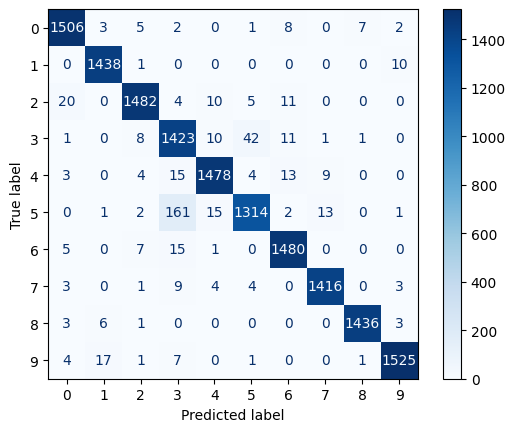

In [18]:
adaboost_classifier.fit(D2_X_train, D2y_train_noisy)
ada_pred2 = adaboost_classifier.predict(D2_X_test)

print(classification_report(D2_y_test, ada_pred2, digits = 4))
cm = confusion_matrix(D2_y_test, ada_pred2, labels=class_names2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names2)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Prediction

In [26]:
import pickle

#load blind text data
test1, y1 = load_data('blind_test1.csv')
test2, y2 = load_data('blind_test2.csv')

model_pkl_file1 = "SVM_5%_noisy_model_D1.pkl"
model_pkl_file2 = "SVM_5%_noisy_model_D2.pkl"
# Load the Model back from file
with open(model_pkl_file1, 'rb') as file:  
    Best_model1 = pickle.load(file)
with open(model_pkl_file2, 'rb') as file:  
    Best_model2 = pickle.load(file)

pred1 = Best_model1.predict(test1)
Pred2 = Best_model2.predict(test2)

In [27]:
#save predictions to csv file
prediction1 = pd.DataFrame(pred1, columns=['y'])
prediction2 = pd.DataFrame(Pred2, columns=['y'])

prediction1.to_csv('d1_1885592.csv', index=False)
prediction2.to_csv('d2_1885592.csv', index=False)